# Handwritten digit recognition
* http://yann.lecun.com/exdb/mnist/

In [26]:
from mnist import MNIST
mndata = MNIST('./Resources/Data/numbers')
mndata.gz = True
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [140]:
print(test_labels[1])
print(MNIST.display(test_images[0]))

2

............................
............................
............................
............................
............................
............................
............................
............................
......@@@@@@................
...........@@@@@@@@@@.......
...................@@.......
...................@@.......
..................@@........
..................@@........
.................@@.........
.................@..........
................@@..........
................@...........
...............@@...........
..............@@............
.............@@@............
.............@@.............
............@@..............
............@@..............
...........@@@..............
...........@@@..............
...........@@...............
............................


## DecisionTrees

In [183]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [57]:
clf = DecisionTreeClassifier()

In [58]:
clf.fit(train_images, train_labels)

DecisionTreeClassifier()

In [62]:
pred_labels =  clf.predict(test_images)

In [80]:
print('Accuracy Score on train data: ', accuracy_score(y_true=np.array(train_labels), y_pred=clf.predict(train_images)))
print('Accuracy Score on test data: ', accuracy_score(y_true=np.array(test_labels), y_pred=pred_labels))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.8765


## MultinomialNB

In [85]:
clf = MultinomialNB()

In [86]:
clf.fit(train_images, train_labels)

MultinomialNB()

In [87]:
pred_labels =  clf.predict(test_images)

In [88]:
print('Accuracy Score on train data: ', accuracy_score(y_true=np.array(train_labels), y_pred=clf.predict(train_images)))
print('Accuracy Score on test data: ', accuracy_score(y_true=np.array(test_labels), y_pred=pred_labels))

Accuracy Score on train data:  0.8252833333333334
Accuracy Score on test data:  0.8365


## Neural network

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
clf = MLPClassifier()

In [29]:
clf.fit(train_images, train_labels)

MLPClassifier()

In [30]:
pred_labels =  clf.predict(test_images)
pred_prob = clf.predict_proba(test_images)

In [33]:
print('Accuracy Score on train data: ', accuracy_score(y_true=np.array(train_labels), y_pred=clf.predict(train_images)))
print('Accuracy Score on test data: ', accuracy_score(y_true=np.array(test_labels), y_pred=pred_labels))

Accuracy Score on train data:  0.9952166666666666
Accuracy Score on test data:  0.9679


In [34]:
clf.n_iter_

88

In [35]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Image converting and testing

In [205]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

def imageprepare(argv):

    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values
    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x)   for x in tv]
    return tva

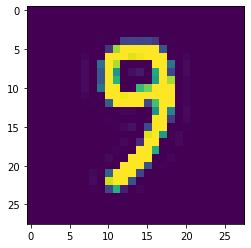

In [231]:
x=[imageprepare('Resources/Data/test.png')]

newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k+=1

plt.imshow(newArr, interpolation='nearest')
plt.show()

In [232]:
table = [(i,temp*100)for i,temp in enumerate(clf.predict_proba(x)[0])]
df = pd.DataFrame(table, columns=['number','chance'])

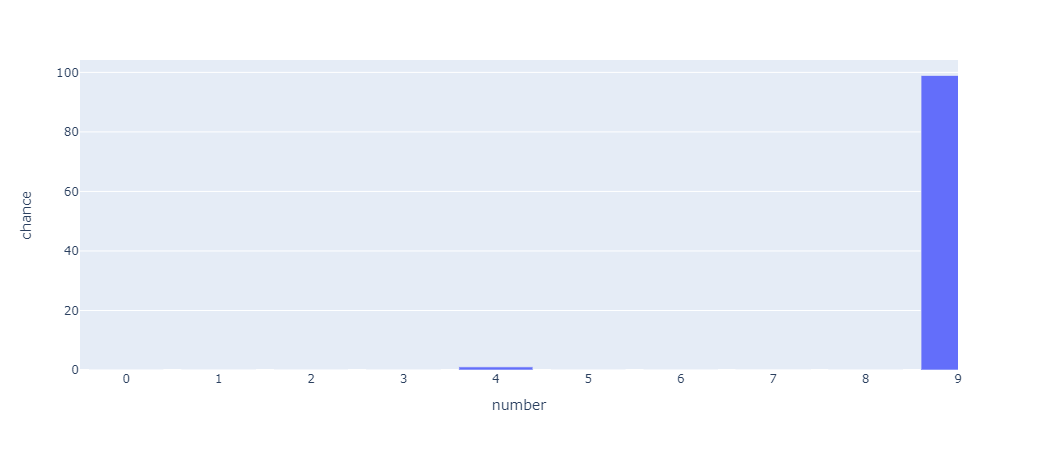

In [233]:
import plotly.express as px
fig = px.bar(df, x='number', y='chance')
fig.update_xaxes(range=[-0.5, 9])
fig